<class 'numpy.ndarray'>


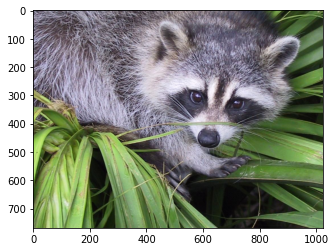

[[121 138 153 ... 119 131 139]
 [ 89 110 130 ... 118 134 146]
 [ 73  94 115 ... 117 133 144]
 ...
 [ 87  94 107 ... 120 119 119]
 [ 85  95 112 ... 121 120 120]
 [ 85  97 111 ... 120 119 118]]


In [17]:
# https://numpy.org/numpy-tutorials/content/tutorial-svd.html

# Linear Algebra on n-dimensional arrays
# Description:This tutorial is for people who have a basic understanding of linear algebra and arrays in NumPy and want to understand how n-dimensional () arrays are represented and can be manipulated.

# We'll be doing matrix decomposition from linalg, the SVD, (to generate compressed approximation of an image)
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
img = misc.face()
# matplotlib.pyplot imread
print(type(img))

# %matplotlib inline #-> only works on ipython
plt.imshow(img)
plt.show()

print(img[:, :, 0])  # red pxs


In [18]:
# Since linalg operations are performed it is better to use 0 - 1 values

img_arr = img / 255

In [19]:
# img_arr In real world cases use img_as_float utility function from scikit-image 
img_arr.max(), img_arr.min()

(1.0, 0.0)

In [ ]:
# For real-world application it is better to use SciPy (however scipy.linalg in some function limited to 2D funtion)

# Quick markdown tutorial
#->use for titles <br>
##->for major headings <br>
###->for subheadings <br>
####->for 4th level subheadings


__boldstr__ or **boldstr**

_italicstr_ or *string*

$ mathematics between dollar signs $ 

`to give paths, filenames, message texts`

> One level indented
>> Two level indentation
>>> Sukur
>>>>>> ya

- Bulleted item
    - Subbulet
        - Michael Faraday
            - Manhattan Project
                - Dwight Eisenhower
                    - Robert Oppenheimer
                        - Albert Einstein

1. However
1. Simple
1. IBM
<br> You don't need to number 1,2,3 instead 1,1,1,1
<a href="http://www.microsoft.com/" id="mashwood"> Link </a>

<p> Very good </p>
<blockquote> HTML code </blockquote>
<em> Italic </em> 
<h1> HTML code </h1>

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

***

There asterisks created the horizontal line above 

[Section title](#mashwood)

<img src="https://cdn.pixabay.com/photo/2015/08/21/00/12/jesus-christ-898330_960_720.jpg" title="God himself">

__[link text](http://www.allah.com)__

You can reach to your active notebook by writing localhost:8888

In [20]:
arr = plt.imread("profile.jpeg")

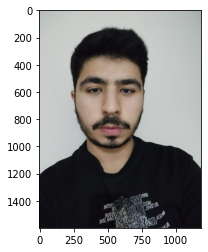

In [21]:
plt.imshow(arr)

In [22]:
gray_img =  img_arr @[0.2126,0.7152, 0.0722]

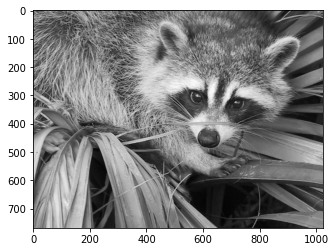

In [23]:
gray_img.shape
plt.imshow(gray_img, cmap='gray')

Now applying the SVD function we can find

<h3> Below is the minimal SVD code </h3>

In [24]:
U, s, V_t = np.linalg.svd(gray_img)

In [25]:
U.shape, s.shape, V_t.shape

((768, 768), (768,), (1024, 1024))

In [27]:
Sigma = np.zeros((U.shape[1], V_t.shape[0]))

In [28]:
Sigma.shape

(768, 1024)

In [29]:
np.fill_diagonal(Sigma, s)

In [31]:
s
linalg.norm(gray_img - U @ Sigma @ V_t)

1.378115963176851e-12

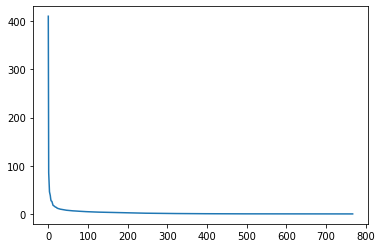

In [32]:
plt.plot(s)
plt.show()

In [35]:
k = 100
approx = U @ Sigma[:, :k] @ V_t[:k,:]
approx

array([[0.41872474, 0.50647953, 0.57292251, ..., 0.5177037 , 0.53621284,
        0.54967611],
       [0.38227503, 0.43845023, 0.4887936 , ..., 0.50709672, 0.52740824,
        0.5416758 ],
       [0.34327025, 0.38963615, 0.4358935 , ..., 0.48729698, 0.50267785,
        0.51336749],
       ...,
       [0.38245455, 0.38042507, 0.40493788, ..., 0.59647327, 0.60246159,
        0.60661833],
       [0.35333126, 0.36144846, 0.39785867, ..., 0.60096558, 0.60703369,
        0.61014747],
       [0.33644198, 0.35453001, 0.40115999, ..., 0.5950453 , 0.60103147,
        0.60335913]])

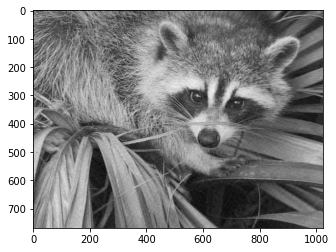

(768, 1024)


In [37]:
plt.imshow(approx, cmap="gray")
plt.show()
print(approx.shape)

<h3 style="text-align: center" > Apply to all Colors </h3>

NumPy linalg library needs our array to be shaped (number_of_matrices, M,N) n number of  MxN matrices 

In [39]:
img_arr_transposed = np.transpose(img_arr,axes =(2,0,1))

In [40]:
img_arr_transposed.shape

(3, 768, 1024)

In [41]:
U, s, V_t = linalg.svd(img_arr_transposed)
U.shape, s.shape, V_t.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

As you can see from above the results are different from gray matrix. We need to use the rows of s.

In [42]:
Sigma = np.zeros((3,768,1024))
for j in range(3):
    np.fill_diagonal(Sigma[j,:,:], s[j, :])

In [43]:
reconstructed = U@Sigma@V_t

In [44]:
reconstructed.shape

(3, 768, 1024)

In [45]:
reconstructed.min(), reconstructed.max()

(-5.0340320020131335e-15, 1.000000000000006)

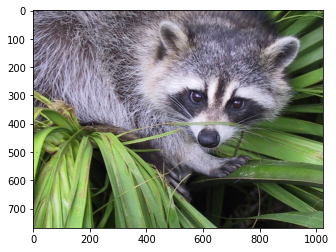

In [46]:
reconstructed = np.clip(reconstructed, 0, 1)
plt.imshow(np.transpose(reconstructed, (1,2,0)))

In [50]:
k = 10
svd_colored = U @ Sigma[...,:k] @ V_t[...,:k,:]

In [51]:
svd_colored.shape

(3, 768, 1024)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


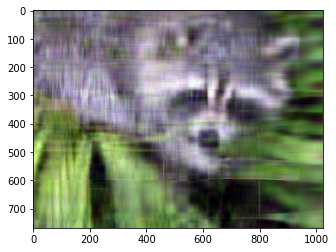

In [53]:
svd = np.transpose(svd_colored, (1,2,0))
plt.imshow(svd)